<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pedro Pury y  Sebastian Raschka (sraschka@wisc.edu) Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

### Ejercicio 1: Arboles de decision

Al entrar al bar, sus cinco amigos, quienes se reúnen al salir
de trabajar, ya tiene sus bebidas sobre la mesa.
María que tiene un cargo de gerente paga la ronda la mitad de las
veces. Pablo paga la ronda la cuarta parte de las veces, mientras
que Sara y Carlos que son becarios pagan indistintamente entre ambos
la octava parte de las veces. Juan nunca sacó la billetera desde
que se reúnen los viernes.



a)  ¿Qué fracción de las veces ud.\ paga la ronda?

Aparentemente nunca pago la ronda

In [3]:
1/2 + 1/4 + 1/8 + 1/8

1.0

b) Calcular la entropía de la distribución de probabilidad
con la que cada uno paga la ronda. ¿Cuál es el número medio
de preguntas (de respuesta binaria) que necesitan hacerse para
saber quién paga la ronda?  

P: probabilidad de que la persona pague la ronda  
- P = 1/2 => la entropia es 0 pues María es el unico elemento del conjunto  
- P = 1/4 => la entropia es 0 tambien pues Pablo es el unico elemento del conjunto
- P = 1/8 => la entropia es 1 pues si tomamos a cada persona como una clase, tenemos la misma proporcion de cada una de las clases
- P = 0 => la entropia es 1 tambien pues estamos Juan y yo.

c) 
Poco después de arribar al bar se suman dos antiguos amigos quienes
no vivieron en la ciudad el último año. Ellos deciden que la próxima
ronda la debe pagar ud.\ y conociendo que cursa esta materia,
lo desafían a predecir que bebida tomará cada uno.



d) 
Usando la información de las tres variables binarias:
sexo, si es o no estudiante y si le gusta o no bailar,
y recordando la elección de bebidas de la noche anterior,
puede construirse la siguiente tabla:


    |Bebida | Género | Estudiante | Baile |
    ---------------------------------------------
    cerveza | M      | T          | T  
    cerveza | M      | F          | T  
    vodka   | M      | F          | F  
    vodka   | M      | F          | F  
    vodka   | F      | T          | T  
    vodka   | F      | F          | F  
    vodka   | F      | T          | T 
    vodka   | F      | T          | T 
    -------------------------------------------------



e) Usando entropía de información entrenar un árbol
de decisión a partir de la tabla anterior.
Registrar todos los valores calculados para elegir las variables
en cada nodo del árbol.



In [8]:
from math import log
# La entropia si elijo cada una de las caracteristicas como raiz del arbol
entropia_genero_M =  - (1/2) * log((1/2),2) -  (1/2) * log((1/2),2)
entropia_genero_F =  - 1 * log(1,2) 
gain_genero = 1 - (4/8) * entropia_genero_M - (4/8) * entropia_genero_F
print("La ganancia de información que obtengo partiendo por genero es: {}".format(gain_genero))

entropia_estudiante_T = - (1/4) * log(1/4,2) - (3/4) * log(3/4)
entropia_estudiante_F = - (1/4) * log(1/4,2) - (3/4) * log(3/4,2)
gain_estudiante = 1 - (4/8) * entropia_estudiante_T - (4/8) * entropia_estudiante_F
print("La ganancia de información que obtengo partiendo por estudiante es: {}".format(gain_estudiante))

entropia_baile_T = - (2/5) * log((2/5),2) - (3/5) * log((3/5),2) 
entropia_baile_F = - (3/3) * log((3/3),2)
gain_baile = 1 - (5/8) * entropia_baile_T - (3/8) * entropia_baile_F
print("La ganancia de información que obtengo partiendo por baile es: {}".format(gain_baile))


La ganancia de información que obtengo partiendo por genero es: 0.5
La ganancia de información que obtengo partiendo por estudiante es: 0.23648016060101568
La ganancia de información que obtengo partiendo por baile es: 0.3931558784658321


Vamos a partir por genero y analizar de nuevo la ganancia de información por entropia.  
Como ya tenemos un conjunto puro en el genero femenino, no vamos a profundizar el analisis ahi  
Ahora tenemos dos conjuntos con 4 elementos cada uno. y vamos analizar la ganancia de información partiendo por otra caracteristica.

In [9]:

entropia_genero_M_estudiante_T =  - (1) * log((1),2)
entropia_genero_M_estudiante_F =  - (1/3) * log((1/3),2) -  (2/3) * log((2/3),2)
gain_genero_estudiante = 1 - (1/4) * entropia_genero_M_estudiante_T - (3/4) * entropia_genero_M_estudiante_F
print("La ganancia de información que obtengo partiendo por genero y estudiante es: {}".format(gain_genero_estudiante))

entropia_genero_M_baile_T =  - (2/2) * log((2/2),2)
entropia_genero_M_baile_F =  - (2/2) * log((2/2),2)
gain_genero_baile = 1 - (2/4) * entropia_genero_M_baile_T - (2/4) * entropia_genero_M_baile_F
print("La ganancia de información que obtengo partiendo por genero y baile es: {}".format(gain_genero_baile))

La ganancia de información que obtengo partiendo por genero y estudiante es: 0.31127812445913283
La ganancia de información que obtengo partiendo por genero y baile es: 1.0


Es claro que ahora partimos por baile y obtenemos dos conjuntos puros. El arbol tiene la siguiente pinta:

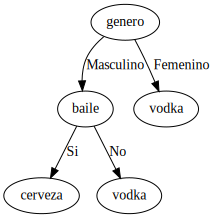

In [12]:
from graphviz import Digraph
dot = Digraph(comment='Recomendación contactologo')

dot.node('A','genero')
dot.node('B','baile')
dot.node('C','cerveza')
dot.node('D','vodka')
dot.node('E','vodka')

dot.edge('A','D',label='  Femenino')
dot.edge('A','B',label='Masculino')
dot.edge('B','C',label='Si')
dot.edge('B','E',label='No')
dot

f)  Proponer una poda del árbol y justificarla.


## 1) Implementing an ID3 Decision Tree ( problem suggested by: Sebastian Raschka (sraschka@wisc.edu)  )

### 1.1) Splitting a node 


First, we are going to implement a function that splits a dataset along a feature axis into sub-datasets. Since we are going to implement a decision tree that only supports categorical features (like ID3) for simplicity, you do not need to account for continuous feature variables. In other words, the splitting function only needs to support integer NumPy arrays.  

To provide an intuitive example, suppose you are given the following NumPy array with four feature values, feature values 0-3:

    np.array([0, 1, 2, 1, 0, 3, 1, 0, 1, 2])
    
The function you are going to implement should return a dictionary, where each dictionary key represents a unique value in the array, and the values are the indices in that array that map to the respective feature value. Hence, based on the feature array above, your `split` function should return the following dictionary:

    {0: array([0, 4, 7]), 
     1: array([1, 3, 6, 8]), 
     2: array([2, 9]), 
     3: array([5])}

Tip: I recommend you to use `np.where` and `np.unique` functions to make the implementation easier. If you do not remember these functions from the "computational foundations" lectures, you can either look up those functions in the NumPy documentation online, or you can execute `np.where?` and `np.unique?` in a new code cell to get more information.

In [53]:
import numpy as np
def split(array):
    res = { classi: np.where(array==classi)[0] for classi in np.unique(array) }
    return res

In [54]:
# More efficient implementation
from collections import defaultdict
def split1(array):
    res = defaultdict(list)
    for i in range(len(array)):
        res[array[i]].append(i)
    return res

I added the following code cell for your convenience to double-check your solution. If your results don't match the results shown below, there is a bug in your implementation.

In [55]:
# DO NOT EDIT OR DELETE THIS CELL

print(split(np.array([0, 1, 2])))
print(split(np.array([1, 0, 1, 0, 0, 1, 0])))
print(split(np.array([1, 0, 3, 2, 0, 1, 1])))

print(split1(np.array([0, 1, 2])))
print(split1(np.array([1, 0, 1, 0, 0, 1, 0])))
print(split1(np.array([1, 0, 3, 2, 0, 1, 1])))


#{0: array([0]), 1: array([1]), 2: array([2])}
#{0: array([1, 3, 4, 6]), 1: array([0, 2, 5])}
#{0: array([1, 4]), 1: array([0, 5, 6]), 2: array([3]), 3: array([2])}

{0: array([0]), 1: array([1]), 2: array([2])}
{0: array([1, 3, 4, 6]), 1: array([0, 2, 5])}
{0: array([1, 4]), 1: array([0, 5, 6]), 2: array([3]), 3: array([2])}
defaultdict(<class 'list'>, {0: [0], 1: [1], 2: [2]})
defaultdict(<class 'list'>, {1: [0, 2, 5], 0: [1, 3, 4, 6]})
defaultdict(<class 'list'>, {1: [0, 5, 6], 0: [1, 4], 3: [2], 2: [3]})


###  1.2) Implement Entropy

After implementing the splitting function, we are now have to implement a criterion function so that we can compare splits on different features, to decide which feature is the best feature to split for growing the decision tree. As discussed in class, our splitting criterion will be Information Gain. However, before we implement an Information Gain function, we need to implement a function that computes the entropy at each node, which we need to compute Information Gain.

For your reference, we defined entropy (i.e., Shannon Entropy) as follows:

$$H(p) = \sum_i p_i \log_2 (1/p_i) = - \sum_i p_i \log_2 (p_i)$$

where you can think of $p_i$ as the proportion of examples with class label $i$ at a given node.

In [58]:
from collections import Counter
Counter(a)

Counter({0: 3, 1: 4, 2: 2, 3: 1})

In [69]:
from collections import Counter
def entropy(array):
    classes = Counter(array)
    n = len(array)
    ent = 0
    for k,v in classes.items():
        pi = v/n
        ent += pi * log(1/pi,2)
    return ent

I added the following code cell for your convenience to double-check your solution. If your results don't match the results shown below, there is a bug in your implementation of the `entropy` function.

In [70]:
# DO NOT EDIT OR DELETE THIS CELL

print(round(entropy(np.array([0, 1, 0, 1, 1, 0])), 4))
print(round(entropy(np.array([1, 2])), 4))
print(round(entropy(np.array([1, 1])), 4))
print(round(entropy(np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])), 4))
print(round(entropy(np.array([0, 0, 0])), 4))
print(round(entropy(np.array([1, 1, 1, 0, 1, 4, 4, 2, 1])), 4))

#1.0
#1.0
#0.0
#0.4395
#0.0
#1.6577

1.0
1.0
0.0
0.4395
0.0
1.6577


### 1.3) Implement Information Gain

Now that you have a working solution for the `entropy` function, the next step is to compute the Information Gain. For your reference, information gain is computed as

$$GAIN(\mathcal{D}, x_j) = H(\mathcal{D}) - \sum_{v \in Values(x_j)} \frac{|\mathcal{D}_v|}{|\mathcal{D}|} H(\mathcal{D}_v).$$

In [77]:
def information_gain(x_array, y_array):
    parent_entropy = entropy(x_array)

    split_dict = split(y_array)
    
    for val in split_dict.values():
        freq = val.size/x_array.size
        child_entropy = entropy([x_array[i] for i in val])
        parent_entropy -= child_entropy*freq
        
    return parent_entropy

I added the following code cell for your convenience to double-check your solution. If your results don't match the results shown below, there is a bug in your implementation of the `information_gain` function.

In [78]:
# DO NOT EDIT OR DELETE THIS CELL

x = np.array([0, 1, 0, 1, 0, 1])
y = np.array([0, 1, 0, 1, 1, 1])
print(round(information_gain(x, y), 4))

x = np.array([0, 0, 1, 1, 2, 2])
y = np.array([0, 1, 0, 1, 1, 1])
print(round(information_gain(x, y), 4))

#0.4591
#0.2516

0.4591
0.2516


### 1.4) Decision Tree Splitting

Now, we should have all the main components that we need for implementing the ID3 decision tree algorithm: a `split` function, an `entropy` function, and an `information_gain` function based on the `entropy` function. 

The next task is combine these functions to recursively split a dataset on its different features to construct a decision tree that separate the examples from different classes well. We will call this function `make_tree`. 

For simplicity, the decision tree returned by the `make_tree` function will be represented by a Python dictionary. To illustrate this, consider the following dataset:

```
Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]
 [2 0]
 [2 1]]

Labels:
 [0 1 0 1 1 1]
```
 
This is a dataset with 6 training examples and two features.  The decision tree in form of the Python dictionary should look like as follows:



You should return a dictionary with the following form:

```
{'X_1 = 0': {'X_0 = 0': array([0]),
             'X_0 = 1': array([0]),
             'X_0 = 2': array([1])},
 'X_1 = 1': array([1, 1, 1])}
 ```
 
Let me further illustrate what the different parts of the dictionary mean. Here, the `'X_1'` in `'X_1 = 0'` refers feature 2 (the first column of the NumPy array; remember that Python starts the index at 0, in contrast to R). 

- 'X_1 = 0': For training examples stored in this node, the second feature has the value 0
- 'X_1 = 1': For training examples stored in this node, the second feature has the value 1

The "array" is a NumPy array that stores the class labels of the training examples at that node. In the case of `'X_1 = 0'` we actually store actually a sub-dictionary, because this node can be split further. If you have trouble understanding this dictionary representation, the following illustration might help:


![](tree-viz-1.png)

In [119]:
def make_tree(X, y):
    
    # Return array if node is empty or pure (1 example in leaf node)
    if y.shape[0] == 1 or y.shape[0] == 0:
        return y

    # Compute information gain for each feature
    nfeatures = X.shape[1]
    nsamples = X.shape[0]
    features_values = [np.array([X[i][feature] for i in range(nsamples)]) for feature in range(nfeatures)]
    gains = np.array([information_gain(features_values[feature],y) for feature in range(nfeatures)])

    # Early stopping if there is no information gain
    if (gains <= 1e-05).all():
        return y
    
    # Else, get best feature
    best_feature = np.argmax(gains)

    
    results = {}
    
    # Use the `split` function to split on the best feature
    subset_dict = split(X[:, best_feature])
    # Note that each entry in the dictionary returned by 
    # split is an attribute_value:array_indices pair.
    # here, we are going to iterate over these key-value
    # pairs and select the respective examples for the
    # new child nodes
    
    for feature_value, train_example_indices in subset_dict.items():
        child_y_subset = np.array([y[i] for i in train_example_indices])
        child_x_subset = np.array([X[i] for i in train_example_indices])

        # Next, we are using "recursion," that is, calling the same
        # tree_split function on the child subset(s)
        
        results["X_%d = %d" % (best_feature, feature_value)] = \
                make_tree(child_x_subset, child_y_subset)

        
    return results

I added the following code cell for your convenience to double-check your solution. If your results don't match the results shown below, there is a bug in your implementation of the `make_tree` function.

In [122]:
# DO NOT EDIT OR DELETE THIS CELL

x1 = np.array([0, 0, 1, 1, 2, 2])
x2 = np.array([0, 1, 0, 1, 0, 1])
X = np.array([x1, x2]).T
y = np.array([0, 1, 0, 1, 1, 1])

print('Inputs:\n', X)
print('\nLabels:\n', y)

print('\nDecision tree:\n', make_tree(X, y))

#Inputs:
# [[0 0]
# [0 1]
# [1 0]
# [1 1]
# [2 0]
# [2 1]]

#Labels:
# [0 1 0 1 1 1]

#Decision tree:
#res =  {'X_1 = 0': {'X_0 = 0': array([0]), 'X_0 = 1': array([0]), 'X_0 = 2': array([1])}, 'X_1 = 1': array([1, 1, 1])}


Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]
 [2 0]
 [2 1]]

Labels:
 [0 1 0 1 1 1]

Decision tree:
 {'X_1 = 0': {'X_0 = 0': array([0]), 'X_0 = 1': array([0]), 'X_0 = 2': array([1])}, 'X_1 = 1': array([1, 1, 1])}


### 1.5) Building a Decision Tree API

The final step of this part of the homework is now to write an API around our decision tree code so that we can use is for making predictions. Here, we will use the common convention, established by scikit-learn, to implement the decision tree as a Python class with 

- a `fit` method that learns the decision tree model from a training set via the `make_tree` function we already implemented;
- a `predict` method to predict the class labels of training examples or any unseen data points.

For making predictions, since not all leaf nodes are guaranteed to be single training examples, we will use a majority voting function to predict the class label as discussed in class. I already implemented a `_traverse` method, which will recursively traverse a decision tree dictionary that is produced by the `make_tree` function.

Note that for simplicity, the `predict` method will only be able to accept one data point at a time (instead of a collection of data points). Hence `x` is a vector of size $\mathbb{R}^m$, where $m$ is the number of features. I use capital letters `X` to denote a matrix of size $\mathbb{R}^{n\times m}$, where $n$ is the number of training examples.

In [157]:
class ID3DecisionTreeClassifer(object):

    def __init__(self):
        self.__fit = {}
    
    def fit(self, X, y):
        self.__fit = make_tree(X,y)
        
    def _majority_vote(self, label_array):
        counter = Counter(label_array)
        max_vote = max(counter.values())
        counter = {v:k for k,v in counter.items()}
        return counter[max_vote]
        
    def _traverse(self, x, d):
        if isinstance(d, np.ndarray):
            return d
        for key in d:
            name, value = key.split(' = ')
            feature_idx = int(name.split('_')[-1])
            value = int(value)
            if x[feature_idx] == value:
                return self._traverse(x, d[key])
        
    def predict(self, x):        
        label_array = self._traverse(x,self.__fit)
        return self._majority_vote(label_array)

I added the following code cell for your convenience to double-check your solution. If your results don't match the results shown below, there is a bug in your implementation of the `make_tree` function.

In [158]:
# DO NOT EDIT OR DELETE THIS CELL

tree = ID3DecisionTreeClassifer()
tree.fit(X, y)

print(tree.predict(np.array([0, 0])))
print(tree.predict(np.array([0, 1])))
print(tree.predict(np.array([1, 0])))
print(tree.predict(np.array([1, 0])))
print(tree.predict(np.array([1, 1])))
print(tree.predict(np.array([2, 0])))
print(tree.predict(np.array([2, 1])))

#0
#1
#0
#0
#1
#1
#1

0
1
0
0
1
1
1
